In [1]:
# import pandana as pdna
import quilt3
import os
import pandana as pdna
from geosnap import Community
%matplotlib inline

C:\Users\liyiw\anaconda3\envs\pbpl204\lib\site-packages\geosnap\_data.py:123: UserWarning: Unable to locate local census data. Streaming instead.
If you plan to use census data repeatedly you can store it locally with the io.store_census function for better performance
  "Unable to locate local census data. Streaming instead.\n"
Loading manifest: 100%|██████████| 5/5 [00:00<00:00, 555.55entries/s]
C:\Users\liyiw\anaconda3\envs\pbpl204\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.spectral module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#pip install -U numpy

The networks can take awhile to download and process from OSM, but we have pre-built networks for every metro in the country stored in our quilt bucket

In [3]:
if not os.path.exists("../data/40140.h5"):
    p = quilt3.Package.browse('osm/metro_networks_8k', 's3://spatial-ucr')
    p['40140.h5'].fetch("../data/")

In [4]:
rd = Community.from_lodes(msa_fips='40140', years=[2017])

C:\Users\liyiw\anaconda3\envs\pbpl204\lib\site-packages\geosnap\_data.py:242: UserWarning: Unable to locate local census 2010 block data. Streaming instead.
If you plan to use census data repeatedly you can store it locally with the io.store_blocks_2010 function for better performance
  "Unable to locate local census 2010 block data. Streaming instead.\n"
Loading manifest: 100%|██████████| 52/52 [00:00<00:00, 4000.29entries/s]
C:\Users\liyiw\anaconda3\envs\pbpl204\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
gdf = rd.gdf

In [6]:
gdf.columns

Index(['geoid', 'year', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01',
       'CFS02', 'CFS03', 'CFS04', 'CFS05', 'create_date', 'earnings_1251_3333',
       'earnings_over_3333', 'earnings_under_1250', 'education_bachelors',
       'education_hs', 'education_lths', 'education_some_college',
       'employees_30_54', 'employees_55plus', 'employees_asian',
       'employees_black', 'employees_female', 'employees_hawaiian_pi',
       'employees_hispanic', 'employees_male', 'employees_native_american',
       'employees_not_hispanic', 'employees_twoplus_races',
       'employees_under_30', 'employees_white', 'geometry', 'housing_units',
       'naics_11', 'naics_21', 'naics_22', 'naics_23', 'naics_31_33',
       'naics_42', 'naics_44_45', 'naics_48_89', 'naics_51', 'naics_52',
       'naics_53', 'naics_54', 'naics_55', 'naics_56', 'naics_61', 'naics_62',
       'naics_71', 'naics_72', 'naics_81', 'naics_90', 'population',
       'total_employees'],
      dtype='object')

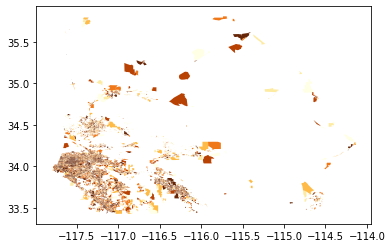

In [7]:
gdf.dropna(subset=['total_employees']).plot(column='total_employees', scheme='quantiles', k=6, cmap='YlOrBr')

In [8]:
net = pdna.Network.from_hdf5("../data/40140.h5")

In [9]:
# change this number up to 5000 (upper limit)
net.precompute(3000)
#net.precompute(4000)

Here we're doing a KNN to get the intersection node nearest to each block centroid

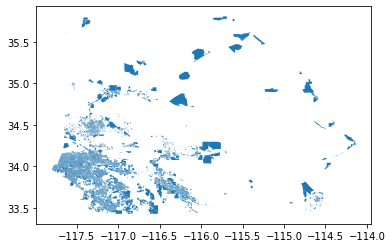

In [10]:
gdf.plot()

In [11]:
gdf["node_ids"] = net.get_node_ids(gdf.centroid.x,
                                   gdf.centroid.y)

In [12]:
gdf

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_90,population,total_employees,node_ids
0,060650429041007,2017,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,22,3,54330815
1,060650420072001,2017,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,318,27,54272992
2,060650481001015,2017,0,0,0,0,0,0,0,0,...,45,0,5,59,0,3,0,1156,125,595787241
3,060650419101008,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14,596244727
4,060650419102016,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,35,0,0,454,49,805129146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,060710122001018,2017,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,120,4,496833622
26102,060710071062001,2017,0,0,0,0,0,0,0,0,...,35,0,59,0,59,0,0,153,355,54566010
26103,060710091191022,2017,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,11,1,54646817
26104,060710087042006,2017,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,59,1,54811716


Then, create a new veraiable on the network (total employees) located on the nodes we just identified, with values equal to total_employees

In [13]:
net.set(gdf.node_ids, variable=gdf["total_employees"], name="total_employees")

Now calculate shortest distance between every node in the network and add up all the jobs accessible within 2km. This will give back a series for every node on the network. Using this series, we can  move up or down levels of the hierarchy by taking the nearest intersection node to any polygon

In [14]:
access = net.aggregate(4000, type="sum", name="total_employees")
#try 3.5km, 3km

In [15]:
access

id
655386         145.208497
658887        4044.298230
658891        3980.274595
658935        3476.923526
660218           0.000000
                 ...     
6568884589     275.482762
6568884598     277.201220
6569138136       0.000000
6569138137       0.000000
6569167594       0.000000
Length: 486514, dtype: float64

In [16]:
access.name ='emp'

In [17]:
gdf['id']= gdf.geoid.str[:11]

In [18]:
gdf.id

0        06065042904
1        06065042007
2        06065048100
3        06065041910
4        06065041910
            ...     
26101    06071012200
26102    06071007106
26103    06071009119
26104    06071008704
26105    06071003612
Name: id, Length: 26106, dtype: object

In [19]:
gdf = gdf.dissolve('id', aggfunc='sum')

In [20]:
tgdf = gdf

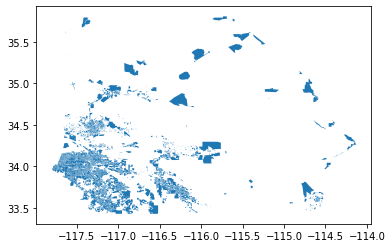

In [21]:
tgdf.plot()

In [22]:
tgdf["node_ids"] = net.get_node_ids(tgdf.centroid.x, tgdf.centroid.y)

In [23]:
tgdf=tgdf.merge(access, left_on='node_ids', right_index=True)

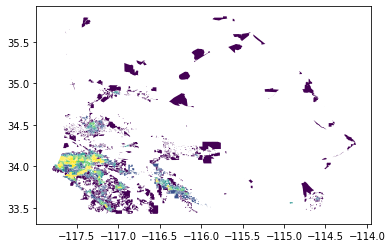

In [24]:
tgdf.plot('emp', scheme="quantiles", k=5)

The idea then would be to identify employment centers at some density cutoff (e.g. everything in yellow), then drop out anything that doesnt meet the total employment threshold
  
e.g. do something like

- select all tracts where access>= `density_threshold`
- dissolve tract boundaries to give you contiguous employment center polys
- select all emp centers where total employment >= `total_threshold`

In [25]:
centers = tgdf[tgdf.emp >=13000]
#change this number

Here are our employment centers in Baltimore (based on the accessibility threshold alone)

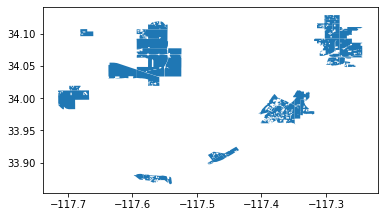

In [26]:
centers.plot()

I dont think geopandas has a generic dissolve that groups contiguous objects...  you have to supply a grouping column, so we need to create one. Simple with a `W`

In [27]:
from libpysal.weights import Queen

In [28]:
w = Queen.from_dataframe(centers)

C:\Users\liyiw\anaconda3\envs\pbpl204\lib\site-packages\libpysal\weights\weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 2 islands with ids: 19, 25.
  warnings.warn(message)


In [29]:
w.component_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 3, 3, 4, 5, 6,
       6, 6, 6, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5])

In [30]:
centers['labels'] = w.component_labels

C:\Users\liyiw\anaconda3\envs\pbpl204\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
centers=centers.dissolve(aggfunc='sum', by='labels')

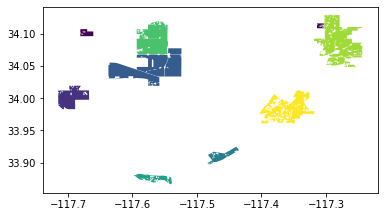

In [32]:
centers.plot('emp', scheme='quantiles', k=8)

In [33]:
centers.emp

labels
0    193562.994973
1     40099.605353
2     43236.835801
3     27647.147596
4     13570.502679
5     33246.511740
6     80412.751797
7     13347.092661
8    158650.271860
Name: emp, dtype: float64

In [34]:
centers.to_file("../data/rvcenter_4km1k.json", driver="GeoJSON")

In [35]:
tgdf.columns

Index(['geometry', 'year', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05',
       'CFS01', 'CFS02', 'CFS03', 'CFS04', 'CFS05', 'create_date',
       'earnings_1251_3333', 'earnings_over_3333', 'earnings_under_1250',
       'education_bachelors', 'education_hs', 'education_lths',
       'education_some_college', 'employees_30_54', 'employees_55plus',
       'employees_asian', 'employees_black', 'employees_female',
       'employees_hawaiian_pi', 'employees_hispanic', 'employees_male',
       'employees_native_american', 'employees_not_hispanic',
       'employees_twoplus_races', 'employees_under_30', 'employees_white',
       'housing_units', 'naics_11', 'naics_21', 'naics_22', 'naics_23',
       'naics_31_33', 'naics_42', 'naics_44_45', 'naics_48_89', 'naics_51',
       'naics_52', 'naics_53', 'naics_54', 'naics_55', 'naics_56', 'naics_61',
       'naics_62', 'naics_71', 'naics_72', 'naics_81', 'naics_90',
       'population', 'total_employees', 'node_ids', 'emp'],
      dtype='object')